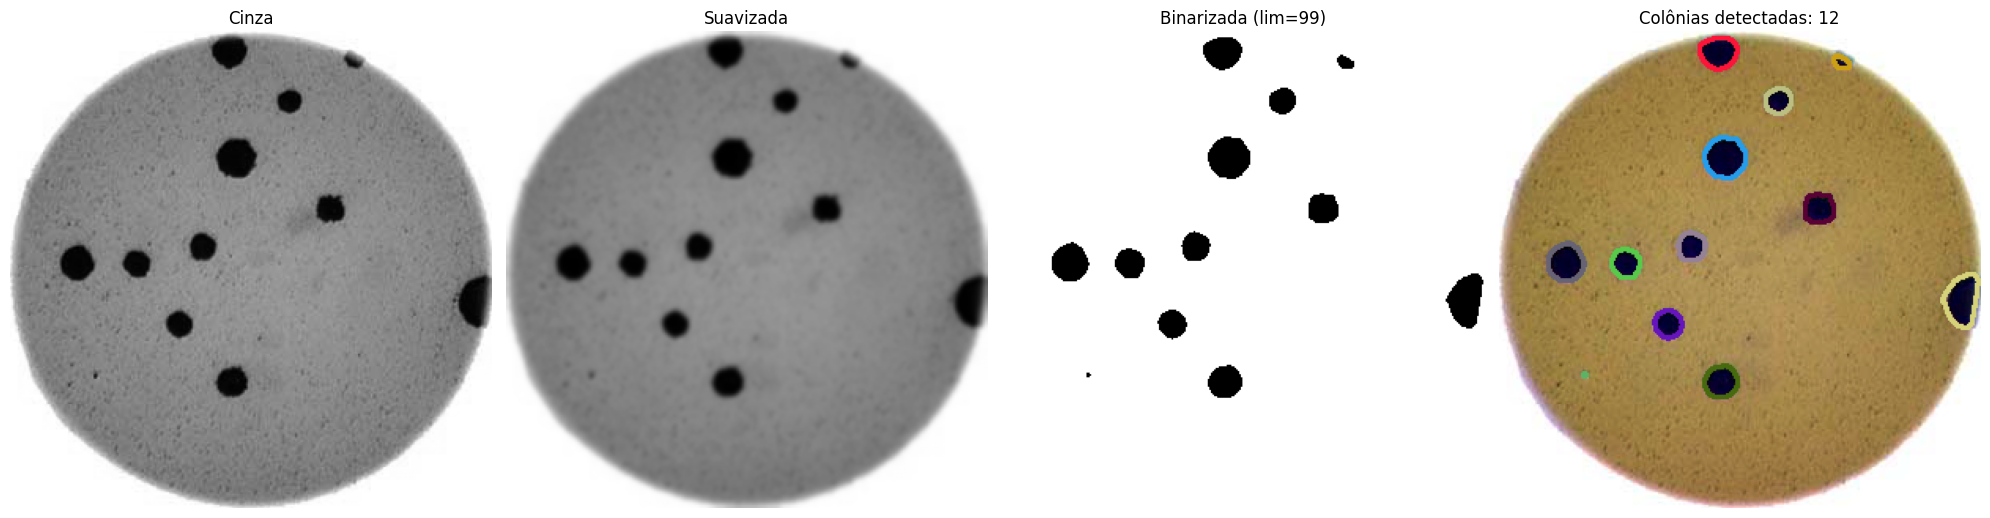

🔹 Total de colônias detectadas: 12


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#  pasta da imagem
path = "./data/colonies-01.tif"

#definicao dos parametros:

manual_thresh = 99          #considerar limite de binarização, 99 foi o ideal. 
blur_ksize = (7,7)           # suavizacao
border_thickness = 2         # espessura da borda = 1 quase nao ve
min_area = 2               # area minima para considerar colonia, 2 ele considera o pqueno pixel inferior esquerdo, acima disso ele ainda mantem uma precisao boa, até 50  

# ler e escala cinza
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# suaviza a imagem - ajuda nas bordas
blur = cv2.GaussianBlur(gray, blur_ksize, 0)

# binariza mantendo o preto das colonias - perfeito para selecionar as boradas nesse caso
_, binary = cv2.threshold(blur, manual_thresh, 255, cv2.THRESH_BINARY)

# uma mascara para identificar as colonias - como esta binarizado, tudo que nao e branco vira colonia
mask_nonwhite = (binary != 255).astype(np.uint8) * 255

# apos a mascara e so identificar o contorno
contours, _ = cv2.findContours(mask_nonwhite.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# filtro para eliminar colonias que nao tenham a area minima definida
colonies = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# criar a borda de cor aleatoria para as colonias
contoured = img.copy()
np.random.seed(42)  

for cnt in colonies:
    color = tuple(np.random.randint(0, 255, 3).tolist())  # cor RGB aleatória
    cv2.drawContours(contoured, [cnt], -1, color, border_thickness)


fig, axs = plt.subplots(1, 4, figsize=(20,6))
axs[0].imshow(gray, cmap='gray'); axs[0].set_title("Cinza"); axs[0].axis('off')
axs[1].imshow(blur, cmap='gray'); axs[1].set_title("Suavizada"); axs[1].axis('off')
axs[2].imshow(binary, cmap='gray'); axs[2].set_title(f"Binarizada (lim={manual_thresh})"); axs[2].axis('off')
axs[3].imshow(cv2.cvtColor(contoured, cv2.COLOR_BGR2RGB))
axs[3].set_title(f"Colônias detectadas: {len(colonies)}"); axs[3].axis('off')
plt.tight_layout(); plt.show()

print(f"🔹 Total de colônias detectadas: {len(colonies)}")


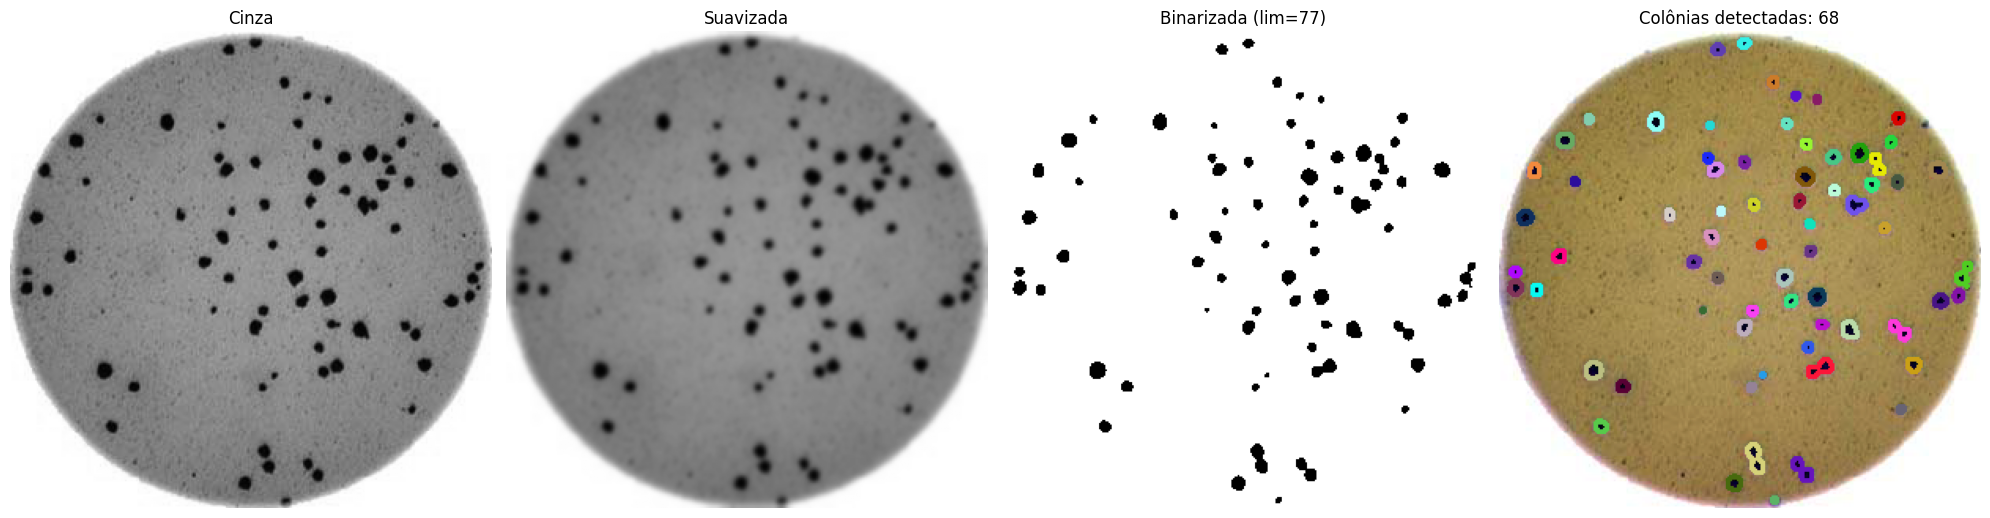

🔹 Total de colônias detectadas: 68


In [168]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#  pasta da imagem
path = "./data/colonies-02.tif"

#definicao dos parametros: para a imagem de media colonia o filtro utilizado na primeira imagem serviu completamente bem, mas a variacao dos parametros pode ser maior 

manual_thresh = 77        #considerar limite de binarizacao, 77 foi o ideal para a imagem com uma quantidade media de colonia. 
blur_ksize = (7,7)           # suavizacao
border_thickness = 2         # espessura da borda = 1 quase nao ve
min_area = 2          # area minima: para a quantidade media de colonia os melhores resultados sao 1 e 2

# ler e escala cinza
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# suaviza a imagem - ajuda nas bordas
blur = cv2.GaussianBlur(gray, blur_ksize, 0)

# binariza mantendo o preto das colonias - perfeito para selecionar as boradas nesse caso
_, binary = cv2.threshold(blur, manual_thresh, 255, cv2.THRESH_BINARY)

# uma mascara para identificar as colonias - como esta binarizado, tudo que nao e branco vira colonia
mask_nonwhite = (binary != 255).astype(np.uint8) * 255

# apos a mascara e so identificar o contorno
contours, _ = cv2.findContours(mask_nonwhite.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# filtro para eliminar colonias que nao tenham a area minima definida
colonies = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# criar a borda de cor aleatoria para as colonias
contoured = img.copy()
np.random.seed(42)  

for cnt in colonies:
    color = tuple(np.random.randint(0, 255, 3).tolist())  # cor RGB aleatória
    cv2.drawContours(contoured, [cnt], -1, color, border_thickness)


fig, axs = plt.subplots(1, 4, figsize=(20,6))
axs[0].imshow(gray, cmap='gray'); axs[0].set_title("Cinza"); axs[0].axis('off')
axs[1].imshow(blur, cmap='gray'); axs[1].set_title("Suavizada"); axs[1].axis('off')
axs[2].imshow(binary, cmap='gray'); axs[2].set_title(f"Binarizada (lim={manual_thresh})"); axs[2].axis('off')
axs[3].imshow(cv2.cvtColor(contoured, cv2.COLOR_BGR2RGB))
axs[3].set_title(f"Colônias detectadas: {len(colonies)}"); axs[3].axis('off')
plt.tight_layout(); plt.show()

print(f"🔹 Total de colônias detectadas: {len(colonies)}")


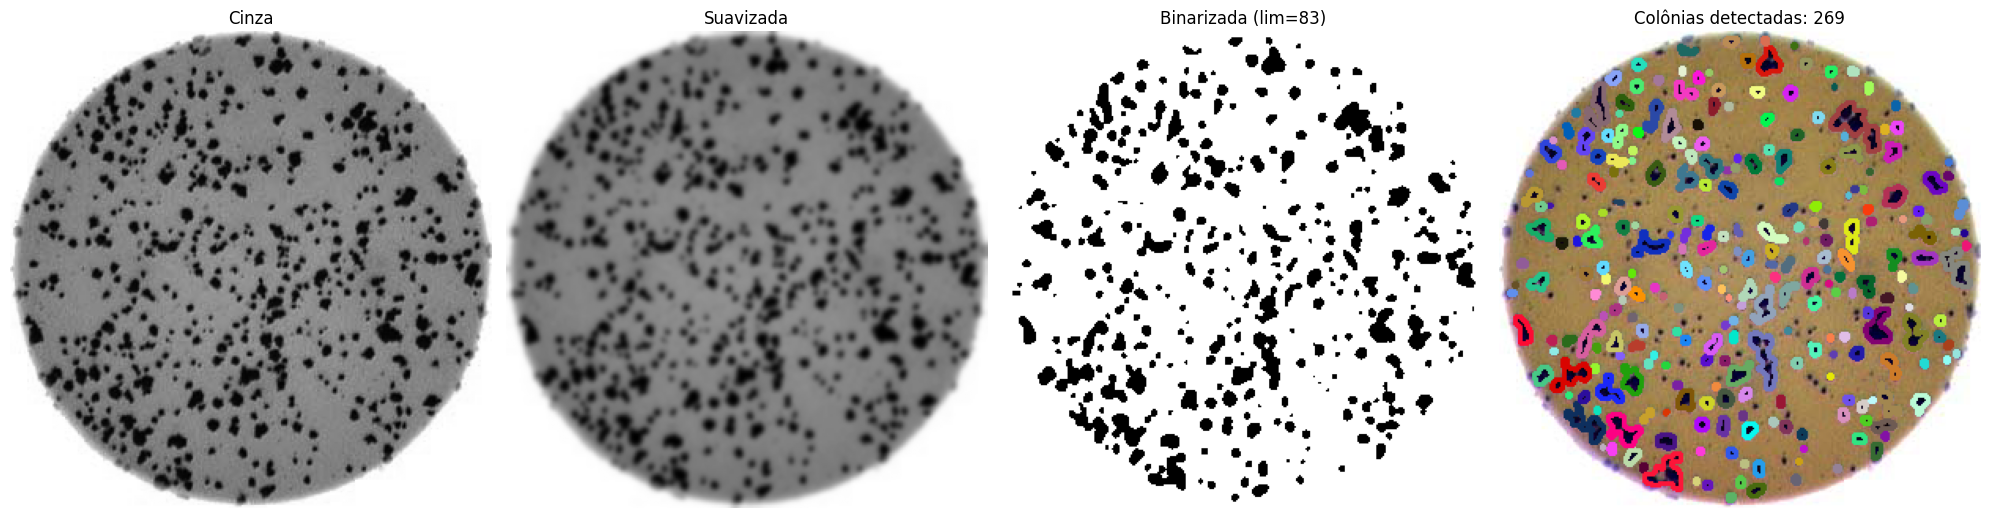

🔹 Total de colônias detectadas: 269


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#  pasta da imagem
path = "./data/colonies-03.tif"

#definicao dos parametros:

manual_thresh = 83          #considerar limite de binarização, 83 foi o ideal. 
blur_ksize = (7,7)           # suavizacao
border_thickness = 2         # espessura da borda >= 1 quase nao ve
min_area = 1               # area minima para considerar colonia, aqui 1 foi o melhor parametro.

# ler e escala cinza
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# suaviza a imagem - ajuda nas bordas
blur = cv2.GaussianBlur(gray, blur_ksize, 0)

# binariza mantendo o preto das colonias - perfeito para selecionar as boradas nesse caso
_, binary = cv2.threshold(blur, manual_thresh, 255, cv2.THRESH_BINARY)

# uma mascara para identificar as colonias - como esta binarizado, tudo que nao e branco vira colonia
mask_nonwhite = (binary != 255).astype(np.uint8) * 255

# apos a mascara e so identificar o contorno
contours, _ = cv2.findContours(mask_nonwhite.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# filtro para eliminar colonias que nao tenham a area minima definida
colonies = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# criar a borda de cor aleatoria para as colonias
contoured = img.copy()
np.random.seed(42)  

for cnt in colonies:
    color = tuple(np.random.randint(0, 255, 3).tolist())  # cor RGB aleatória
    cv2.drawContours(contoured, [cnt], -1, color, border_thickness)


fig, axs = plt.subplots(1, 4, figsize=(20,6))
axs[0].imshow(gray, cmap='gray'); axs[0].set_title("Cinza"); axs[0].axis('off')
axs[1].imshow(blur, cmap='gray'); axs[1].set_title("Suavizada"); axs[1].axis('off')
axs[2].imshow(binary, cmap='gray'); axs[2].set_title(f"Binarizada (lim={manual_thresh})"); axs[2].axis('off')
axs[3].imshow(cv2.cvtColor(contoured, cv2.COLOR_BGR2RGB))
axs[3].set_title(f"Colônias detectadas: {len(colonies)}"); axs[3].axis('off')
plt.tight_layout(); plt.show()

print(f"🔹 Total de colônias detectadas: {len(colonies)}")
